In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from datetime import datetime
import plotly.express as px
import seaborn as sns


In [5]:
# Open the CSV file in read mode
with open('/content/drive/MyDrive/Data_Science/Alturos Project/v5_20230407_091351_95m.csv', mode='r') as file:
    # Create a CSV reader object
    df_95 = pd.read_csv(file, sep=',')

In [ ]:
# Open the CSV file in read mode
with open('/content/drive/MyDrive/Data_Science/Alturos Project/v5_20230409_090939_206m.csv', mode='r') as file:
    # Create a CSV reader object
    df_206 = pd.read_csv(file, sep=',')

In [ ]:
with open('/content/drive/MyDrive/Data_Science/Alturos Project/v5_20230408_082538_310m.csv', mode='r') as file:
    # Create a CSV reader object
    df_310 = pd.read_csv(file, sep=',')

In [ ]:
df_95.drop()

<ipython-input-19-a1732254a4c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  high_correlation_matrix = df_95.corr().applymap(lambda x: x if abs(x) > 0.7 and x != 1.0 else np.nan)


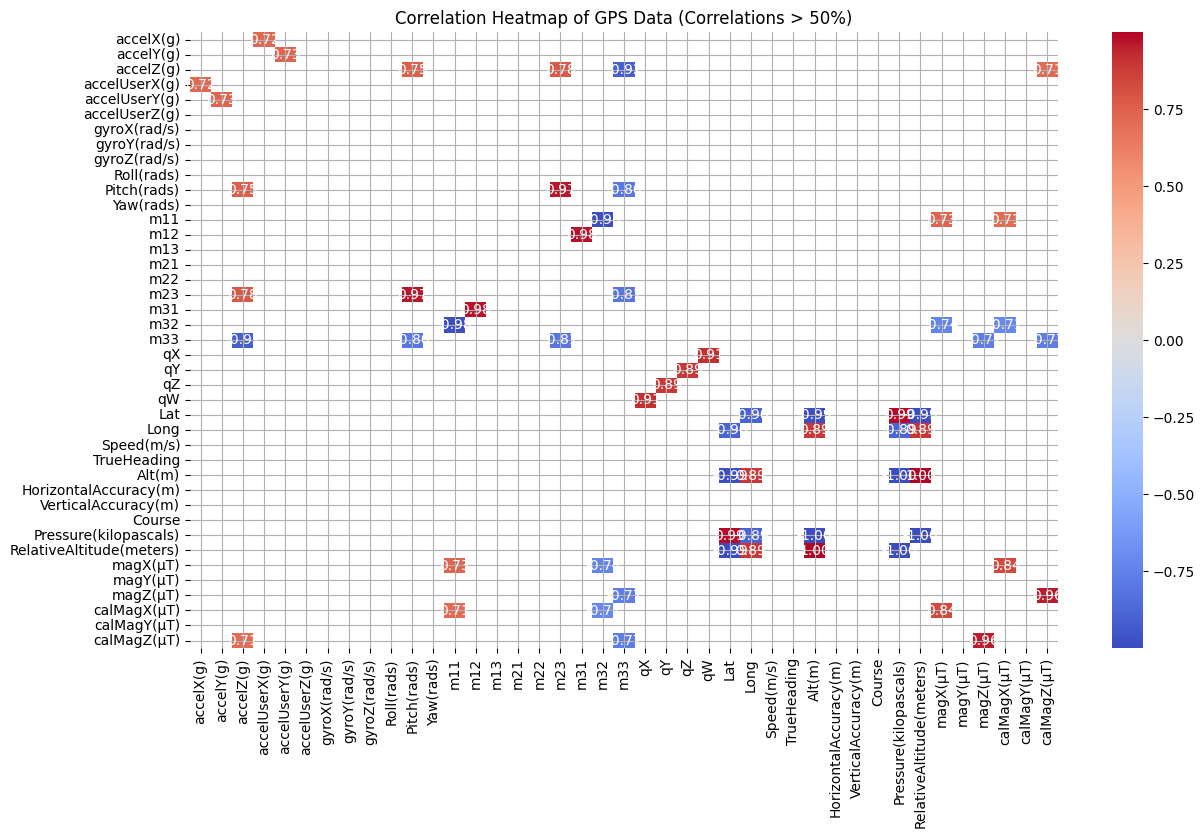

In [ ]:

# Filter the correlation matrix for correlations higher than 50%
high_correlation_matrix = df_95.corr().applymap(lambda x: x if abs(x) > 0.7 and x != 1.0 else np.nan)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(high_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of GPS Data (Correlations > 50%)')
plt.grid(True)
plt.show()


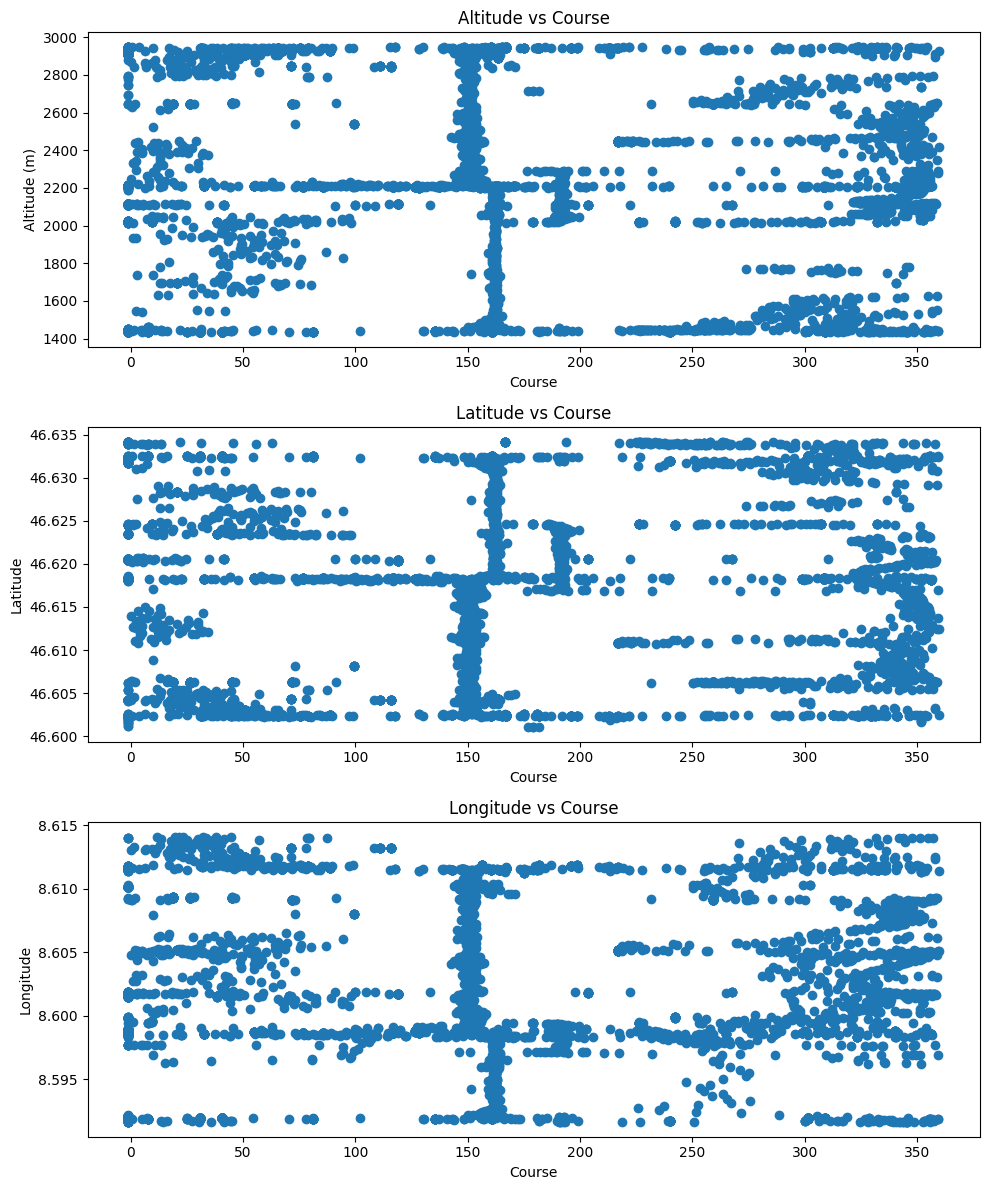

In [ ]:
import matplotlib.pyplot as plt

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Plot altitude vs course
axs[0].scatter(df_95['Course'], df_95['Alt(m)'])
axs[0].set_xlabel('Course')
axs[0].set_ylabel('Altitude (m)')
axs[0].set_title('Altitude vs Course')

# Plot latitude vs course
axs[1].scatter(df_95['Course'], df_95['Lat'])
axs[1].set_xlabel('Course')
axs[1].set_ylabel('Latitude')
axs[1].set_title('Latitude vs Course')

# Plot longitude vs course
axs[2].scatter(df_95['Course'], df_95['Long'])
axs[2].set_xlabel('Course')
axs[2].set_ylabel('Longitude')
axs[2].set_title('Longitude vs Course')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [6]:
# Assuming 'df_95' is your DataFrame containing 'Timestamp' and 'Speed(m/s)' columns
# Convert 'Timestamp' column to datetime format if not already done
df_95['Timestamp'] = pd.to_datetime(df_95['Timestamp'])

# Sort DataFrame by timestamp
df_95.sort_values('Timestamp', inplace=True)

# Calculate change in speed
df_95['Speed_change'] = df_95['Speed(m/s)'].diff()

# Calculate change in time (in seconds)
df_95['Time_change'] = df_95['Timestamp'].diff().dt.total_seconds()

# Compute acceleration
df_95['Acceleration'] = df_95['Speed_change'] / df_95['Time_change']

# Print the DataFrame with acceleration
print(df_95[['Timestamp', 'Speed(m/s)', 'Acceleration']])


                   Timestamp  Speed(m/s)  Acceleration
0    2023-04-07 09:13:51.953      0.1935           NaN
1    2023-04-07 09:13:52.957      0.4469      0.252390
2    2023-04-07 09:13:53.961      0.2260     -0.220020
3    2023-04-07 09:13:54.965      0.5294      0.302191
4    2023-04-07 09:13:55.969      0.0000     -0.527291
...                      ...         ...           ...
5712 2023-04-07 10:49:25.706      1.1109     -0.048904
5713 2023-04-07 10:49:26.710      1.0336     -0.076992
5714 2023-04-07 10:49:27.713      1.1682      0.134197
5715 2023-04-07 10:49:28.717      1.2437      0.075199
5716 2023-04-07 10:49:29.721      1.1386     -0.104681

[5717 rows x 3 columns]


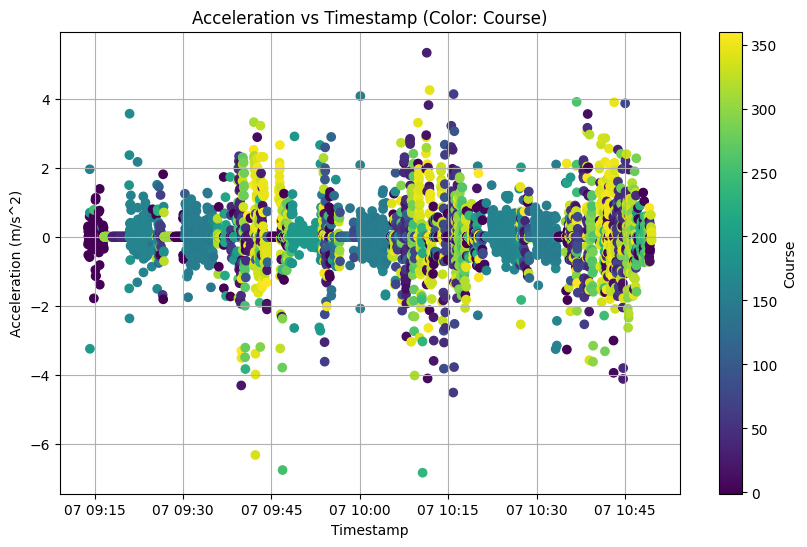

In [9]:

# Plot acceleration as a function of timestamp, with course as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Timestamp'], df_95['Acceleration'], c=df_95['Course'], cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration vs Timestamp (Color: Course)')
plt.colorbar(scatter, label='Course')
plt.grid(True)
plt.show()



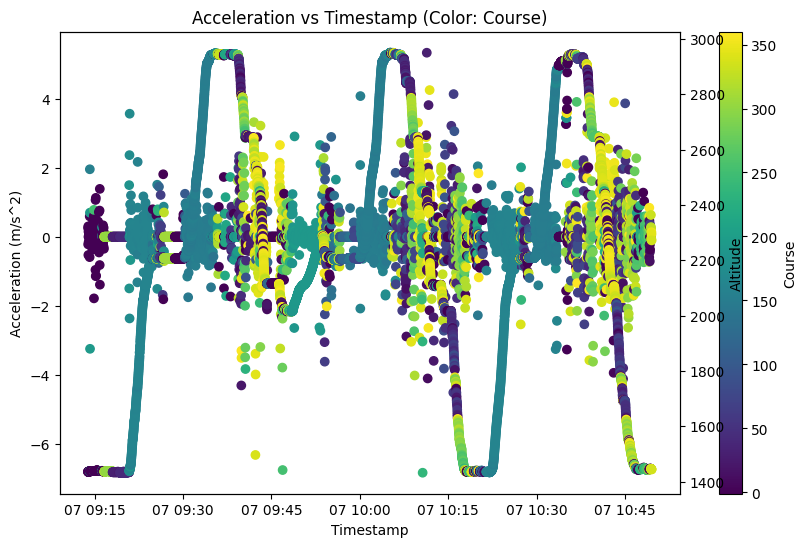

In [8]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot acceleration as a function of timestamp, with course as color
scatter = ax1.scatter(df_95['Timestamp'], df_95['Acceleration'], c=df_95['Course'], cmap='viridis')
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.set_title('Acceleration vs Timestamp (Color: Course)')
plt.colorbar(scatter, label='Course')

# Create a secondary y-axis for Alt
ax2 = ax1.twinx()
ax2.set_ylabel('Altitude')

# Plot Alt on the secondary y-axis
scatter_alt = ax2.scatter(df_95['Timestamp'], df_95['Alt(m)'], c=df_95['Course'], cmap='viridis')

plt.show()


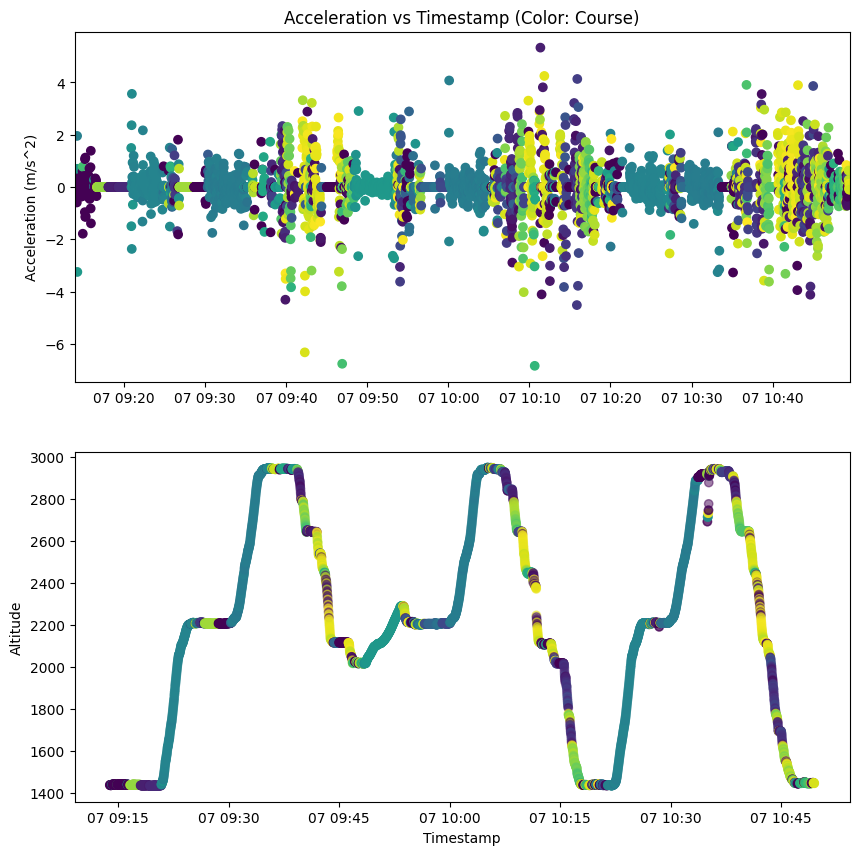

In [16]:
import matplotlib.pyplot as plt

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot acceleration on the first subplot
scatter_acceleration = ax1.scatter(df_95['Timestamp'], df_95['Acceleration'], c=df_95['Course'], cmap='viridis')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.set_title('Acceleration vs Timestamp (Color: Course)')
#plt.colorbar(scatter_acceleration, ax=ax1, label='Course')

# Plot Altitude on the second subplot
scatter_altitude = ax2.scatter(df_95['Timestamp'], df_95['Alt(m)'], c=df_95['Course'], cmap='viridis', alpha=0.5)
ax2.set_ylabel('Altitude')

# Set the x-axis limits to match between subplots
ax1.set_xlim(df_95['Timestamp'].min(), df_95['Timestamp'].max())

# Add a shared x-axis label
plt.xlabel('Timestamp')

plt.show()



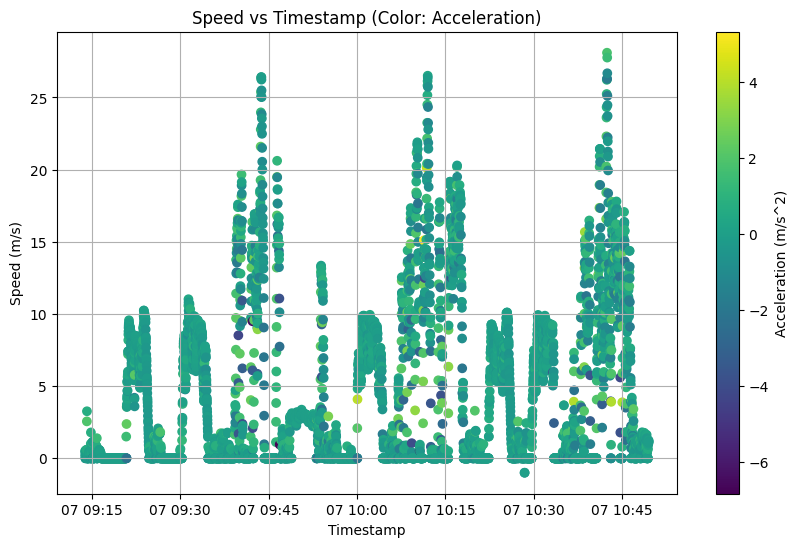

In [ ]:
# Plot speed as a function of timestamp, with acceleration as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Timestamp'], df_95['Speed(m/s)'], c=df_95['Acceleration'], cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Timestamp (Color: Acceleration)')
plt.colorbar(scatter, label='Acceleration (m/s^2)')
plt.grid(True)
plt.show()


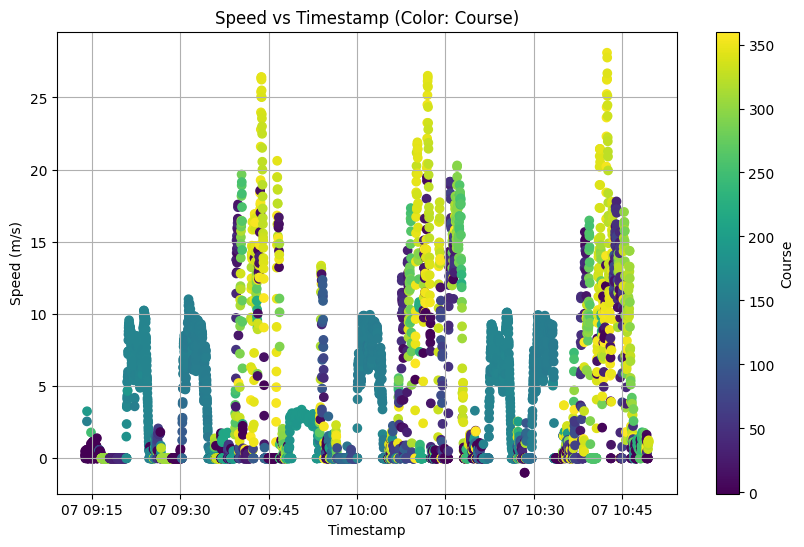

In [17]:
# Plot speed as a function of timestamp, with acceleration as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Timestamp'], df_95['Speed(m/s)'], c=df_95['Course'], cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Speed (m/s)')
plt.title('Speed vs Timestamp (Color: Course)')
plt.colorbar(scatter, label='Course')
plt.grid(True)
plt.show()


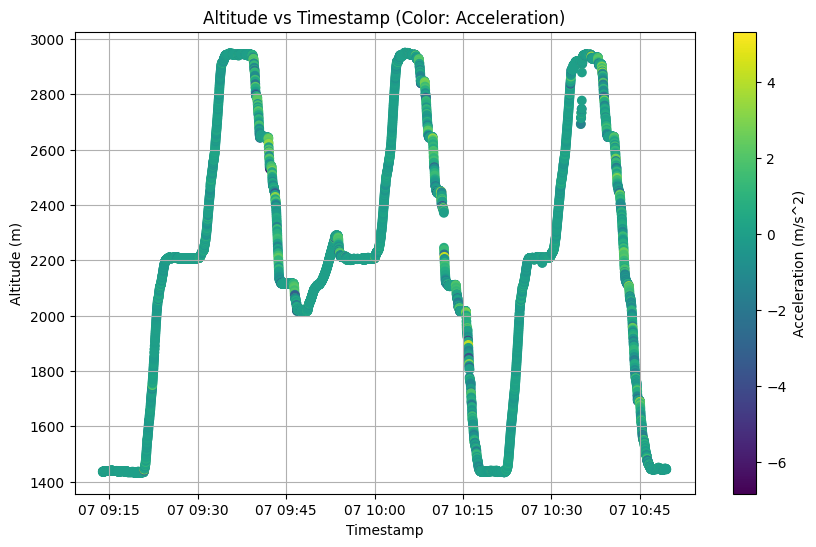

In [ ]:

# Plot altitude as a function of timestamp, with acceleration as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Timestamp'], df_95['Alt(m)'], c=df_95['Acceleration'], cmap='viridis')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Timestamp (Color: Acceleration)')
plt.colorbar(scatter, label='Acceleration (m/s^2)')
plt.grid(True)
plt.show()

In [20]:
# Calculate the altitude difference between consecutive points
df_95['Altitude_change'] = df_95['Alt(m)'].diff()

# Print the DataFrame with altitude change
print(df_95[['Timestamp', 'Alt(m)', 'Altitude_change']])


                   Timestamp       Alt(m)  Altitude_change
0    2023-04-07 09:13:51.953  1435.913452              NaN
1    2023-04-07 09:13:52.957  1436.339233         0.425781
2    2023-04-07 09:13:53.961  1436.754761         0.415528
3    2023-04-07 09:13:54.965  1436.686890        -0.067871
4    2023-04-07 09:13:55.969  1436.686890         0.000000
...                      ...          ...              ...
5712 2023-04-07 10:49:25.706  1446.016724        -0.219116
5713 2023-04-07 10:49:26.710  1445.440552        -0.576172
5714 2023-04-07 10:49:27.713  1444.932739        -0.507813
5715 2023-04-07 10:49:28.717  1444.740845        -0.191894
5716 2023-04-07 10:49:29.721  1444.783936         0.043091

[5717 rows x 3 columns]


In [26]:
df_95.loc[abs(df_95['Altitude_change']) > 50, 'Altitude_change'] = np.nan


In [25]:
import numpy as np

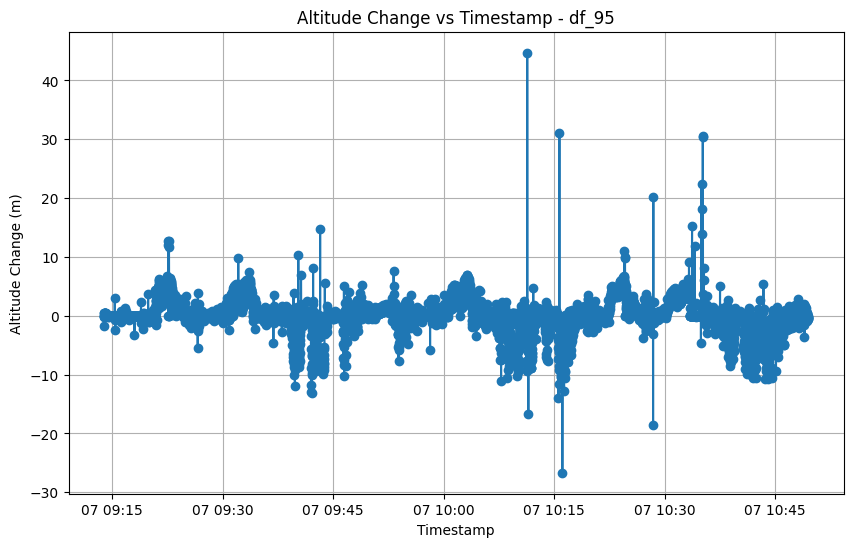

In [ ]:
# Plot altitude change as a function of timestamp for df_95
plt.figure(figsize=(10, 6))
plt.plot(df_95['Timestamp'], df_95['Altitude_change'], marker='o', linestyle='-')
plt.xlabel('Timestamp')
plt.ylabel('Altitude Change (m)')
plt.title('Altitude Change vs Timestamp - df_95')
plt.grid(True)
plt.show()


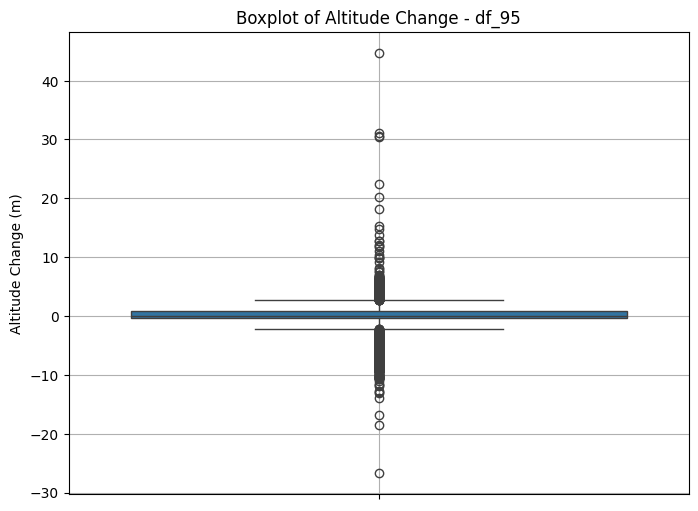

In [ ]:
import seaborn as sns

# Plot a boxplot of the altitude change for df_95
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_95['Altitude_change'])
plt.ylabel('Altitude Change (m)')
plt.title('Boxplot of Altitude Change - df_95')
plt.grid(True)
plt.show()


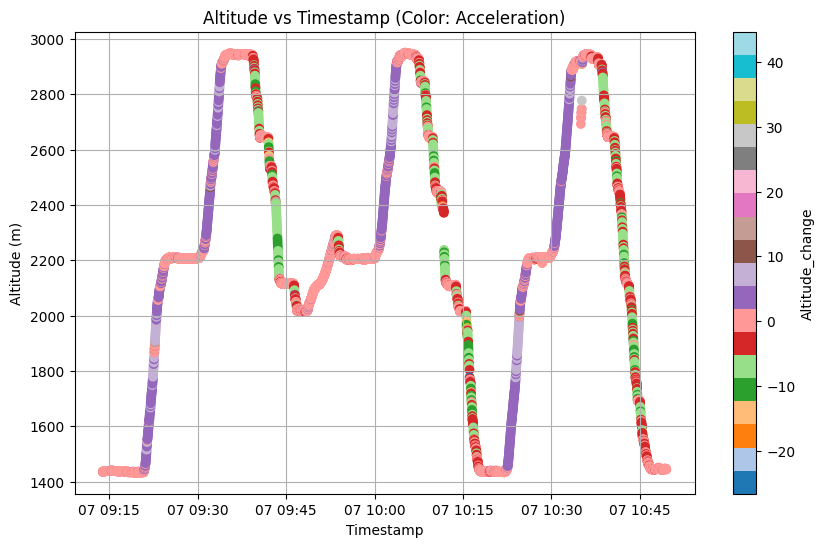

In [27]:
# Plot altitude as a function of timestamp, with acceleration as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Timestamp'], df_95['Alt(m)'], c=df_95['Altitude_change'], cmap='tab20')
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Timestamp (Color: Acceleration)')
plt.colorbar(scatter, label='Altitude_change')
plt.grid(True)
plt.show()

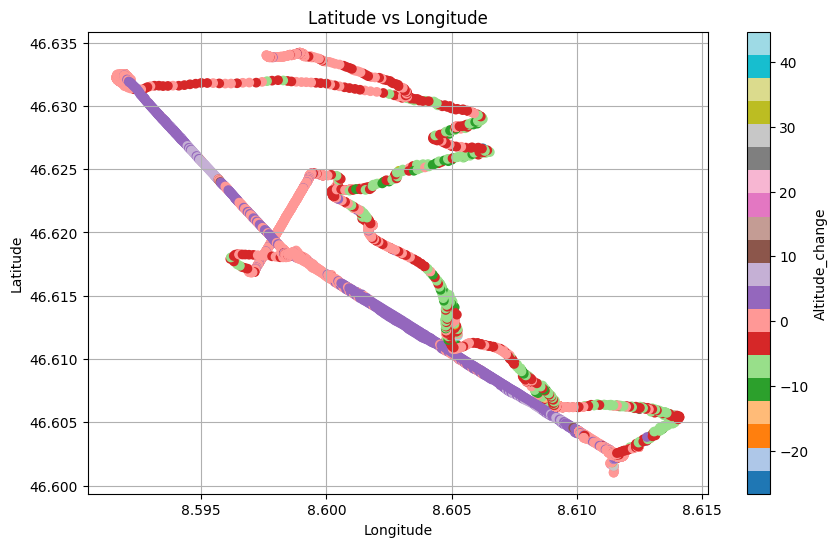

In [28]:
# Plot latitude as a function of longitude, with acceleration as color
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Long'], df_95['Lat'], c=df_95['Altitude_change'], cmap='tab20')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude vs Longitude')
plt.colorbar(scatter, label='Altitude_change')
plt.grid(True)
plt.show()

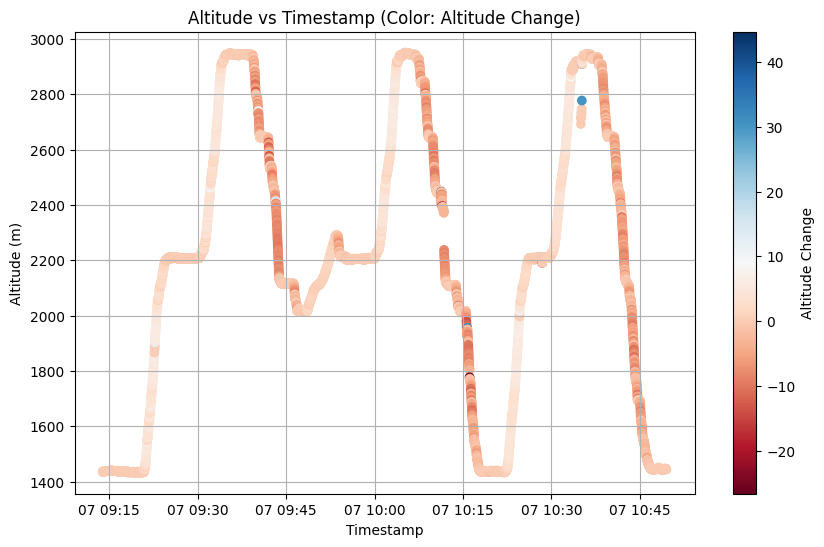

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Create a custom colormap
colors = ['blue', 'red']  # Positive change: blue, Negative change: red
cmap = 'RdBu'

# Plot altitude as a function of timestamp, with altitude change as color using custom colormap
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_95['Timestamp'], df_95['Alt(m)'], c=df_95['Altitude_change'], cmap=cmap)
plt.xlabel('Timestamp')
plt.ylabel('Altitude (m)')
plt.title('Altitude vs Timestamp (Color: Altitude Change)')
plt.colorbar(scatter, label='Altitude Change')
plt.grid(True)
plt.show()
